In [15]:
import numpy as np
from keras.utils.np_utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from lb4.lib import plot_confusion_matrix
print('---prepare data---')
def label_to_int(label):
    if label == 'DH':
        return 0
    elif label == 'SL':
        return 1
    elif label == 'NO':
        return 2


samples = np.zeros((310, 7))
i = 0
with open('column_3C.dat', 'r') as file:
    for line in file.readlines():
        split = line.split()
        label = label_to_int(split[6])
        str_arr = np.array(split[0:6])
        str_arr.astype(float)
        arr = np.append(str_arr, label)
        samples[i] =  arr
        i=i+1

np.random.shuffle(samples)
Y_labels = to_categorical(samples[:, -1])
X_samples = samples[:, :6]

---prepare data---


In [27]:
print('---Compile network')
activation = 'relu'
model = models.Sequential()
model.add(layers.Dense(64, activation=activation, input_dim=6))
model.add(layers.Dense(64, activation=activation))
model.add(layers.Dense(32, activation=activation))
model.add(layers.Dense(8, activation=activation))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(epochs = 500, x=X_samples, y=Y_labels, batch_size = 16)

---Compile network
Train on 310 samples
Epoch 1/500
310/310 [==============================] - 1s 2ms/sample - loss: 2.1414 - accuracy: 0.5258
Epoch 2/500
310/310 [==============================] - 0s 103us/sample - loss: 0.5670 - accuracy: 0.7548
Epoch 3/500
310/310 [==============================] - 0s 116us/sample - loss: 0.4663 - accuracy: 0.7774
Epoch 4/500
310/310 [==============================] - 0s 113us/sample - loss: 0.4951 - accuracy: 0.7806
Epoch 5/500
310/310 [==============================] - 0s 113us/sample - loss: 0.4768 - accuracy: 0.7903
Epoch 6/500
310/310 [==============================] 

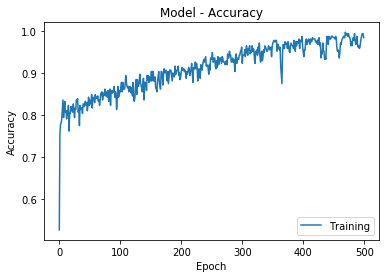

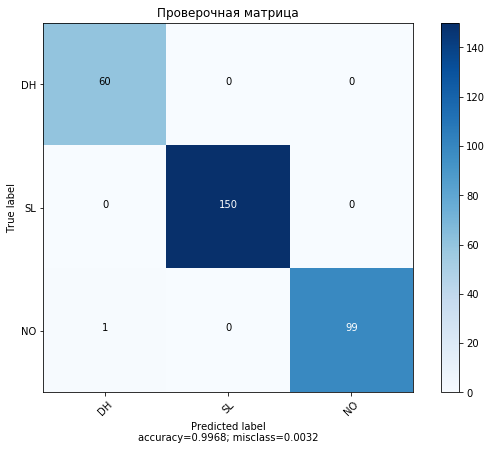

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_samples), axis=1)

cf = confusion_matrix(samples[:, -1], y_pred)

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training'], loc='lower right')
plt.show()
plt.close()
np.set_printoptions(precision=2)

title = 'Проверочная матрица'
labels_arr = ['DH', 'SL', 'NO']

plot_confusion_matrix(cf, title = title,
                             target_names = labels_arr,
                             normalize=False,
                                 cmap=plt.cm.Blues)
